In [74]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [64]:
def create_ts_data(data,target, window_size = 5):
    i = 1
    while i < window_size:
        data["co2_{}".format(i)] = data["co2"].shift(-i)
        i += 1
    data["target"] = data["co2"].shift(-i)
    data = data.dropna(axis=0)
    return data

window_size = 5
target = "target"

In [65]:
data = pd.read_csv("co2.csv")
data.head()

,time,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [66]:
data["time"] = pd.to_datetime(data["time"])
data["co2"] = data["co2"].interpolate()

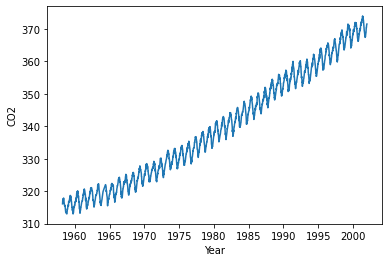

In [67]:
fig, ax = plt.subplots()
ax.plot(data["time"], data["co2"])
ax.set_xlabel("Year")
ax.set_ylabel("CO2")
plt.show()

In [68]:
data = create_ts_data(data, target, window_size)
data.head()

,time,co2,co2_1,co2_2,co2_3,co2_4,target
0,1958-03-29,316.1,317.3,317.6,317.5,316.4,316.90
1,1958-04-05,317.3,317.6,317.5,316.4,316.9,317.20
2,1958-04-12,317.6,317.5,316.4,316.9,317.2,317.50
3,1958-04-19,317.5,316.4,316.9,317.2,317.5,317.90
4,1958-04-26,316.4,316.9,317.2,317.5,317.9,317.55


In [69]:
x = data.drop([target,'time'], axis=1)
y = data[target]

In [41]:
training_ratio = 0.8

In [70]:
x_train = x[:int(len(x)*training_ratio)]
y_train = y[:int(len(x)*training_ratio)]

In [71]:
x_test = x[int(len(x)*training_ratio):]
y_test = y[int(len(x)*training_ratio):]

In [72]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [73]:
y_predict = reg.predict(x_test)

In [75]:
print("MSE {}".format(mean_squared_error(y_test, y_predict)))
print("MAE {}".format(mean_absolute_error(y_test, y_predict)))
print("R2 {}".format(r2_score(y_test, y_predict)))

MSE 0.2204494736034663
MAE 0.3605603788359241
R2 0.9907505918201436


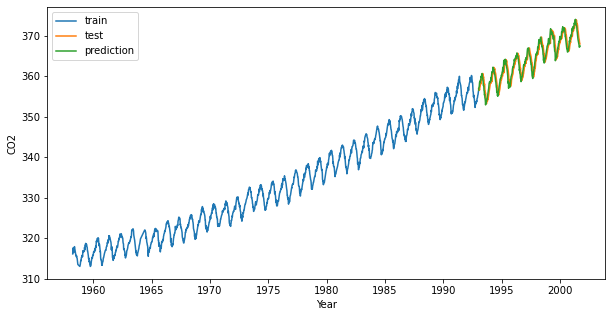

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data["time"][:int(len(x)*training_ratio)], data["co2"][:int(len(x)*training_ratio)], label="train")
ax.plot(data["time"][int(len(x)*training_ratio):], data["co2"][int(len(x)*training_ratio):], label="test")
ax.plot(data["time"][int(len(x)*training_ratio):], y_predict, label="prediction")
ax.set_xlabel("Year")
ax.set_ylabel("CO2")
plt.legend()
plt.show()